In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
new_Autism=pd.read_csv('/content/dataset (1).csv')
new_Autism.head(n=3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES


In [3]:
new_Autism.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class_ASD          0
dtype: int64

In [4]:
new_Autism.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [46]:
for i in new_Autism.columns:
  print(set(new_Autism[i].tolist()))

{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{'?', '47', '50', '27', '60', '26', '55', '34', '25', '42', '46', '35', '36', '30', '28', '22', '44', '58', '41', '48', '31', '52', '39', '56', '19', '59', '38', '49', '53', '45', '32', '61', '54', '51', '43', '29', '17', '33', '20', '383', '24', '37', '40', '64', '23', '21', '18'}
{'m', 'f'}
{'?', 'Others', 'Hispanic', 'White-European', 'Black', 'Latino', 'Turkish', 'Pasifika', "'South Asian'", 'others', "'Middle Eastern '", 'Asian'}
{'no', 'yes'}
{'no', 'yes'}
{"'Sierra Leone'", 'Russia', 'Kazakhstan', 'Ukraine', 'Germany', "'United Arab Emirates'", 'Egypt', 'Turkey', 'Jordan', 'Chile', 'Iceland', 'Spain', 'Serbia', 'Argentina', "'United States'", 'Nicaragua', 'Niger', "'Czech Republic'", 'Iran', 'Iraq', "'United Kingdom'", 'AmericanSamoa', 'Nepal', 'Japan', 'Portugal', 'Cyprus', 'Australia', "'Costa Rica'", "'South Africa'", 'Oman', "'Saudi Arabia'", 'Armenia', "'New Zealand'", 'China', 'Indonesia', 'Netherlands',

In [6]:
# we can see there is a special character in many of this columns 
set(new_Autism['age'].tolist())
new_Autism['age'].mode()

0    21
dtype: object

In [7]:
list(map(lambda x:'21' if x=='?' else x,set(new_Autism['age'].tolist())))

['21',
 '47',
 '50',
 '27',
 '60',
 '26',
 '55',
 '34',
 '25',
 '42',
 '46',
 '35',
 '36',
 '30',
 '28',
 '22',
 '44',
 '58',
 '41',
 '48',
 '31',
 '52',
 '39',
 '56',
 '19',
 '59',
 '38',
 '49',
 '53',
 '45',
 '32',
 '61',
 '54',
 '51',
 '43',
 '29',
 '17',
 '33',
 '20',
 '383',
 '24',
 '37',
 '40',
 '64',
 '23',
 '21',
 '18']

In [8]:
list(map(lambda x:'unknown' if x=='?' else x,set(new_Autism['ethnicity'].tolist())))

['unknown',
 'Others',
 'Hispanic',
 'White-European',
 'Black',
 'Latino',
 'Turkish',
 'Pasifika',
 "'South Asian'",
 'others',
 "'Middle Eastern '",
 'Asian']

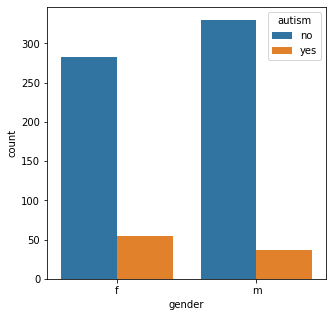

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender',hue='autism',data=new_Autism)
plt.show()

In [28]:
new_Autism['autism'].groupby(new_Autism['jaundice']).value_counts().sort_index(ascending=False)

jaundice  autism
yes       yes        20
          no         49
no        yes        71
          no        564
Name: autism, dtype: int64

jaundice and autism has no relation with each other

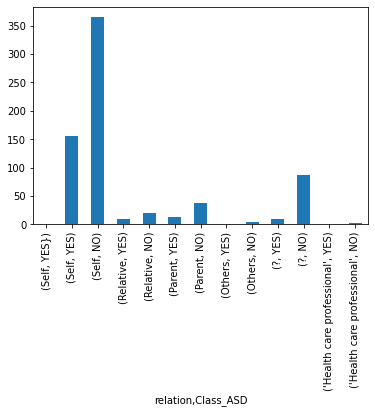

In [29]:
new_Autism['Class_ASD'].groupby(new_Autism['relation']).value_counts().sort_index(ascending=False).plot.bar()

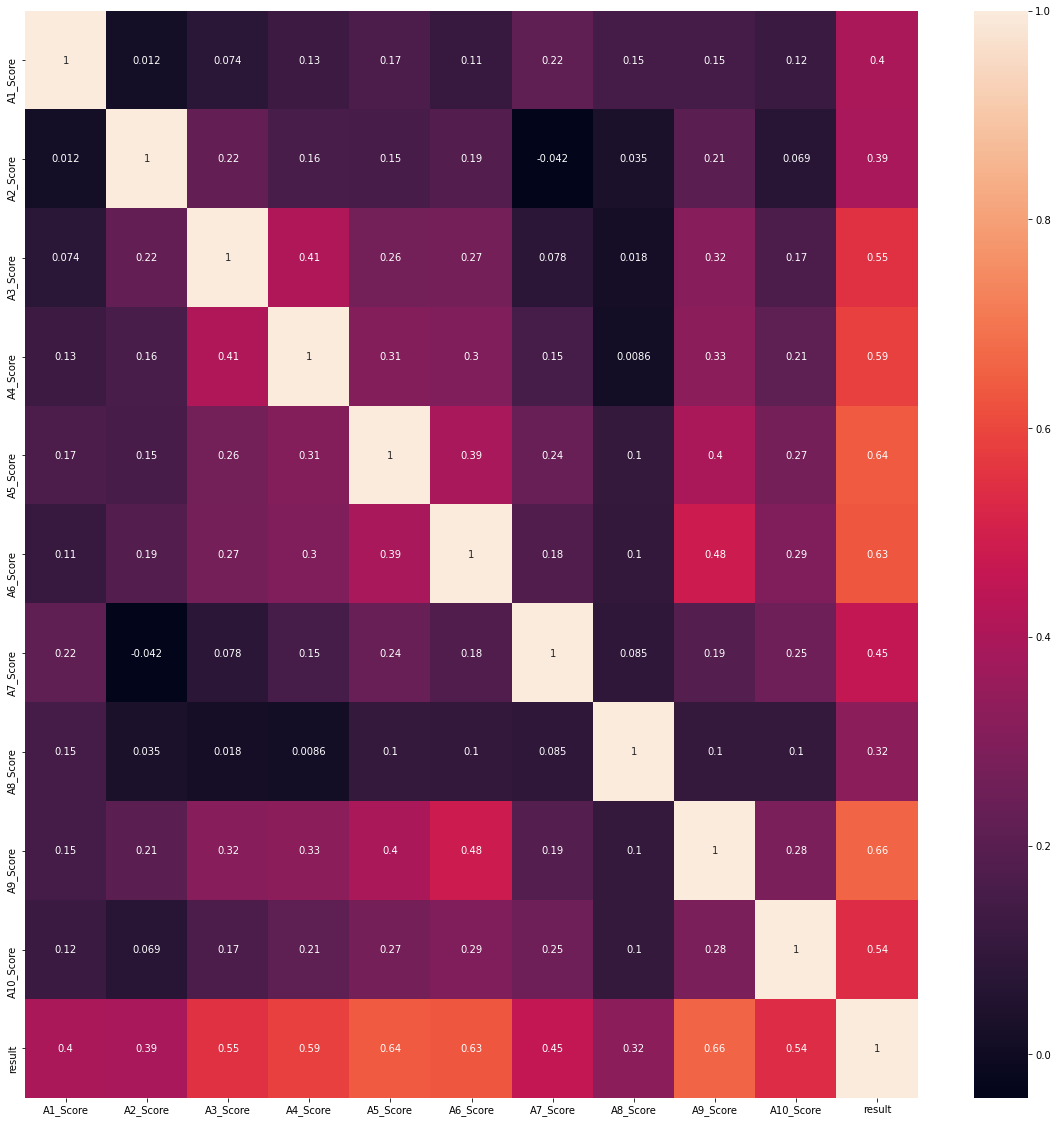

In [30]:
plt.figure(figsize=(20,20))
corr=new_Autism.corr()
sns.heatmap(corr,annot=True)

correlation factor by which we can drop features too but our correlation value is very low which will not be helpful to drop feature in that basic so we will drop by using model feature importance

def correlation(dataset, threshold): col_corr = set() # Set of all the names of correlated columns corr_matrix = dataset.corr() for i in range(len(corr_matrix.columns)): for j in range(i): if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value colname = corr_matrix.columns[i] # getting the name of column col_corr.add(colname) return col_corr

In [ ]:
#corr_features= correlation(X_train, 0.3)
#len(set(corr_features))

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb_df=new_Autism.apply(lb.fit_transform)
lb_df.head(n=2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,9,0,10,0,0,10,0,6,0,5,0
1,1,1,0,1,0,0,0,1,0,1,7,1,6,0,1,25,0,5,0,5,0


In [11]:
X=lb_df.drop(['Class_ASD'],axis=1)  #Feature Matrix
y=lb_df['Class_ASD']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
                #('logisticregression', LogisticRegression())])


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [22]:
pipe.score(X_test, y_test)

0.96

In [23]:
predictions=pipe.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
acc

0.96

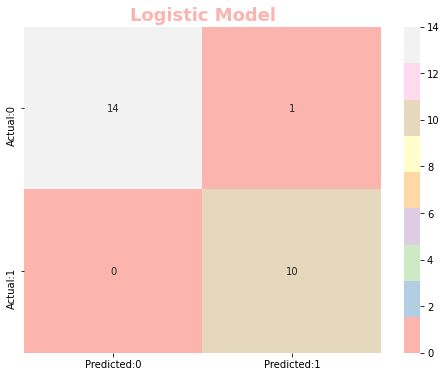

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cf=confusion_matrix(y_test,predictions)
cf_matrix=pd.DataFrame(data=cf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='Pastel1')
fm={'size':18,'color':'#fbb4ae','weight':'bold'}
plt.title('Logistic Model',**fm)
plt.show()

##We can see our FN & TN is almost 0 which is very good when it comes about healthcare problems
##whereas FN & TN is also called as TypeI and Type II error

In [34]:
cr=classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



In [39]:
y_score1 =pipe.predict_proba(X_test)[:,1]

In [42]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1=metrics.roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  1.0


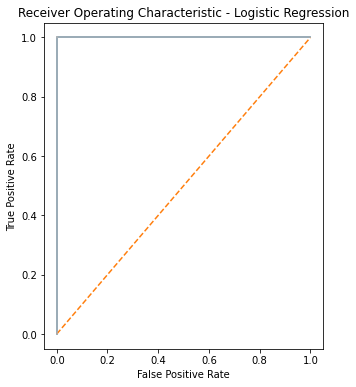

In [44]:
plt.figure(figsize=(5,6))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()